The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.
I built a Data Science Model Itself

### Step 1: Importing Libraries and Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
plt.style.use('ggplot')
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

### Load the datasets

In [3]:
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

### Step 2: Exploratory Data Analysis (EDA)
* Perform EDA to gain insights into the dataset
* Analyze distributions, summary statistics, correlations, etc.
* Visualize the data using plots and charts

In [4]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


**ObserVations**

* In Client Dataset there are 25 columns and 14605 rows 
* No Missing Values Observed
* Churn is the Target Column
* It Contains 8 Categorical Column and Remaining Numerical Columns
---------------------------------------------------------------------
* In Price Dataset it has 8 columns and 193001 rows 
* No Missing Values Observed
*It Contains 2 Categorical Column and Remaining Numerical Columns

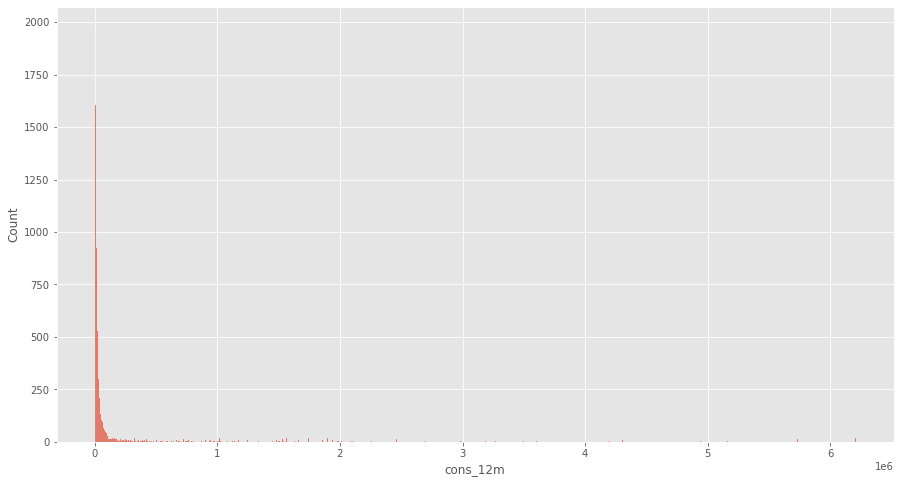

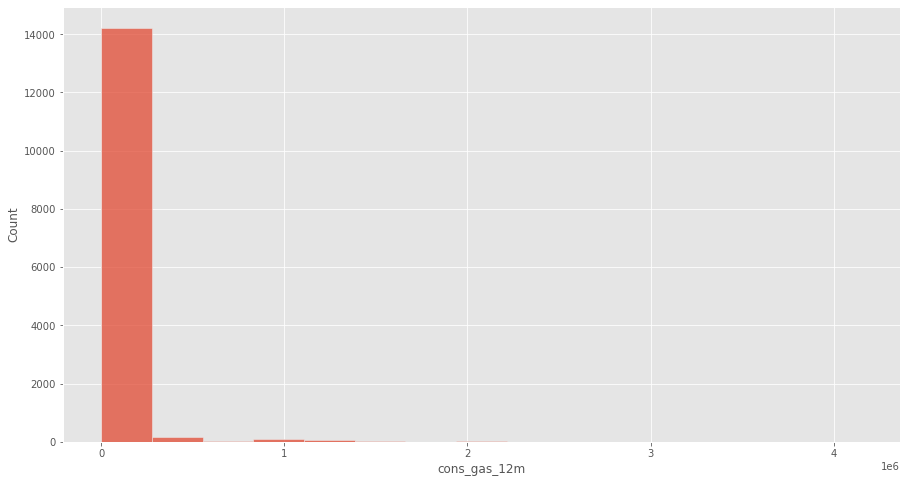

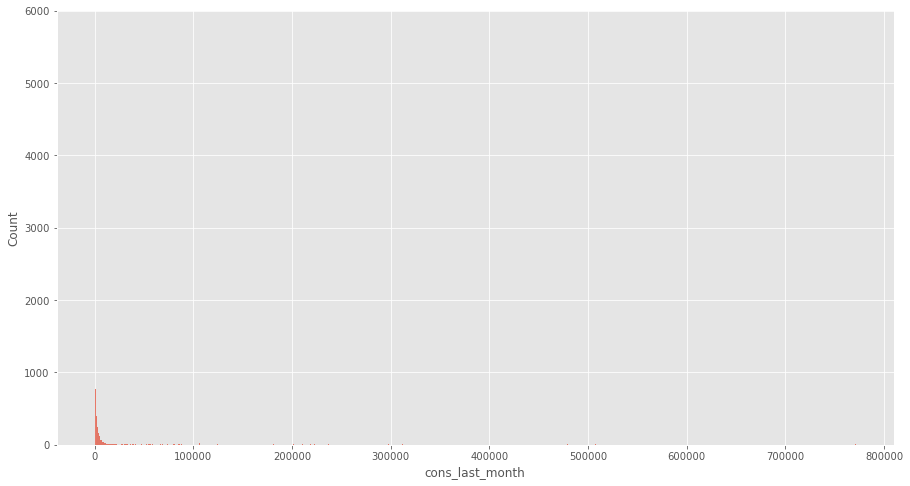

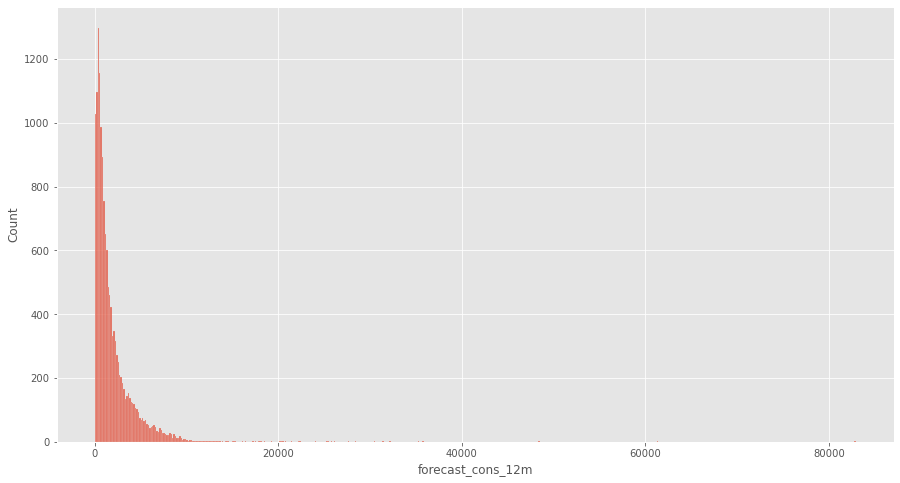

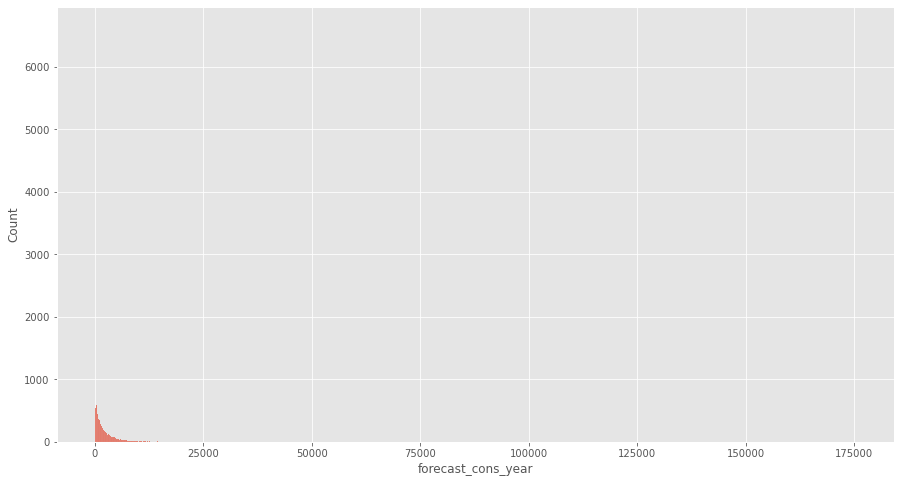

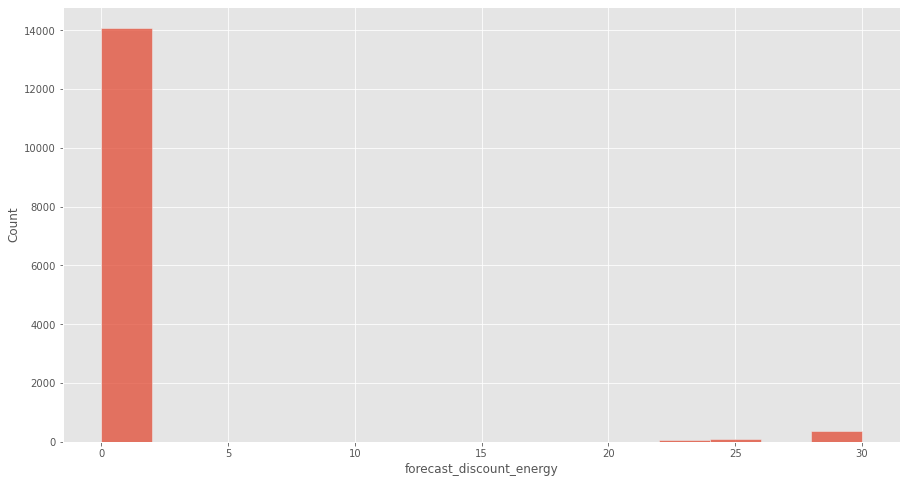

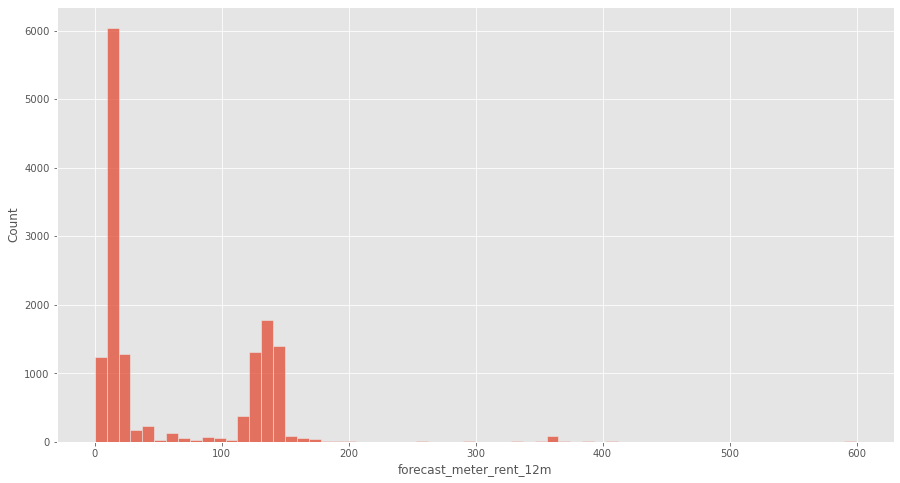

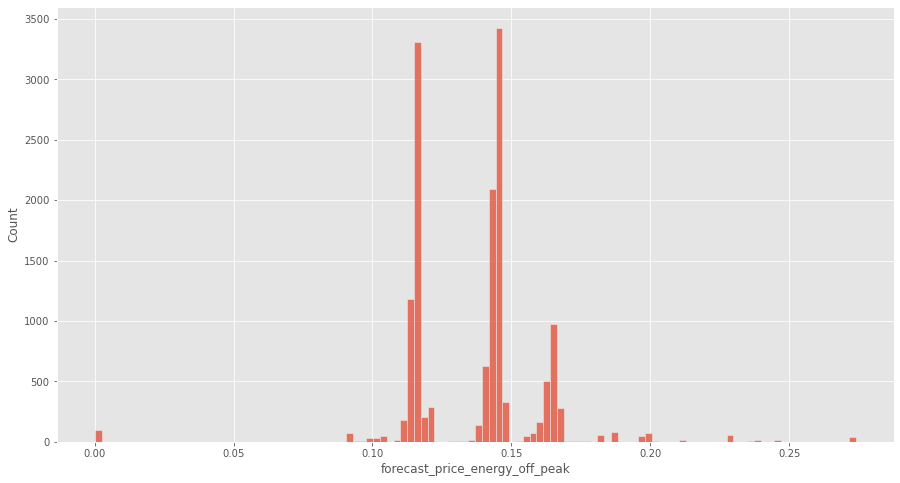

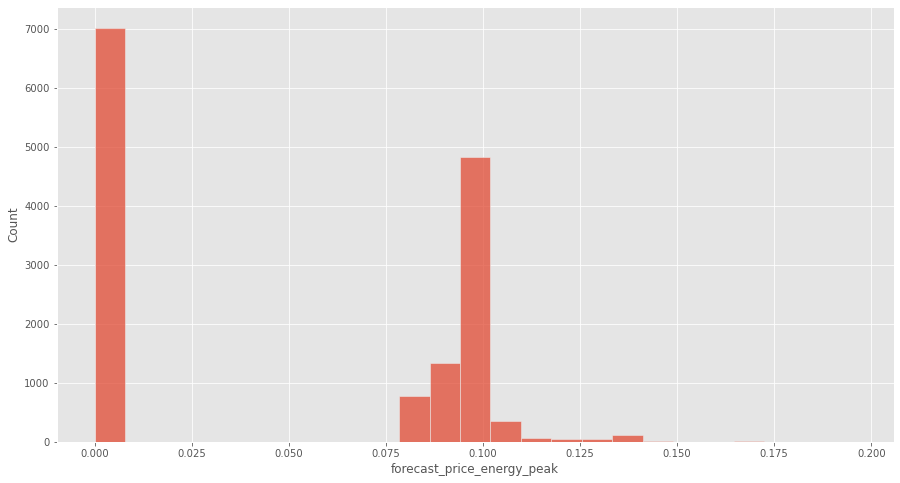

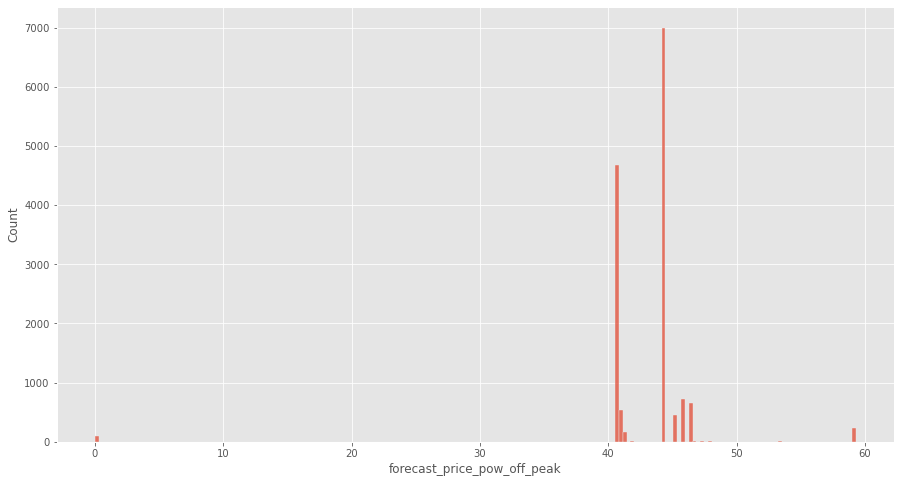

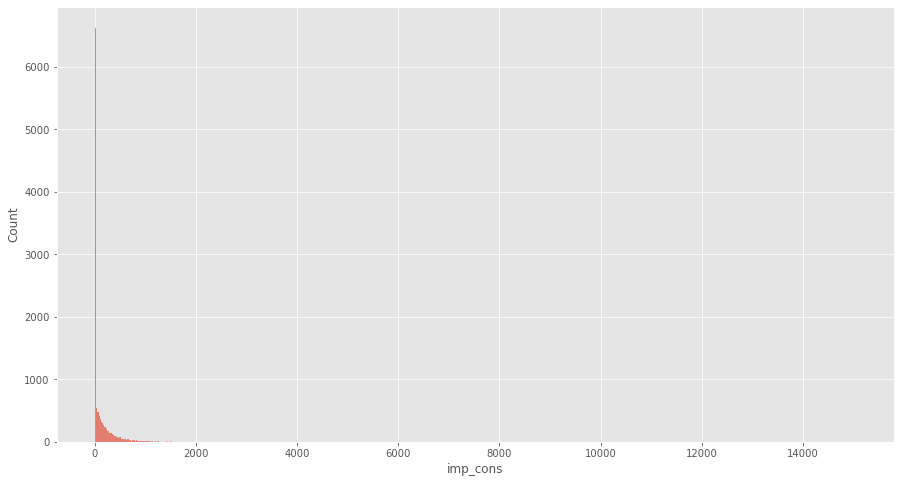

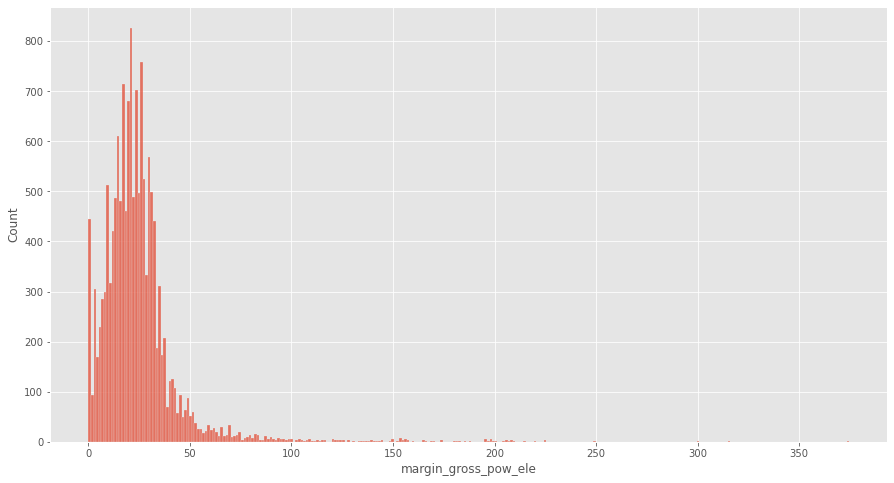

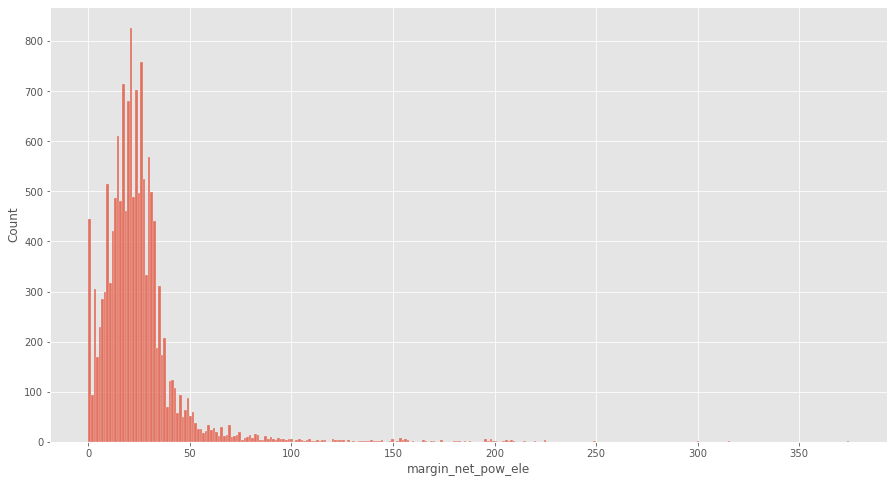

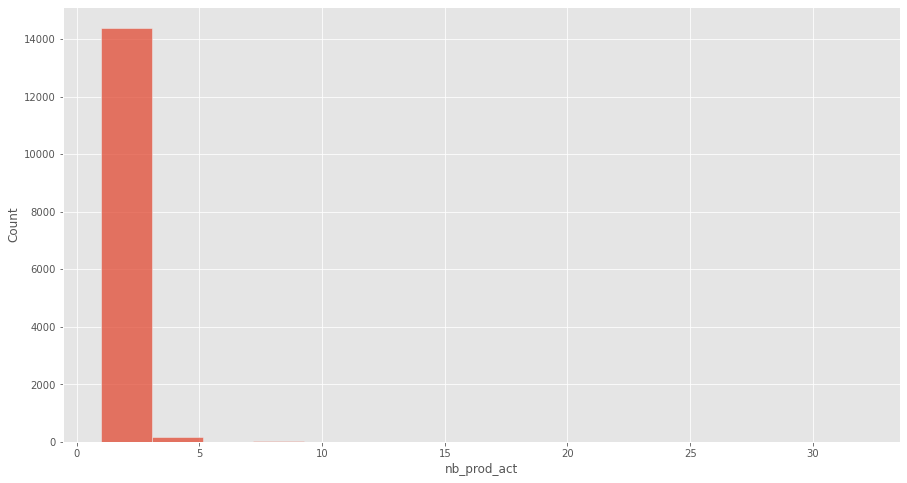

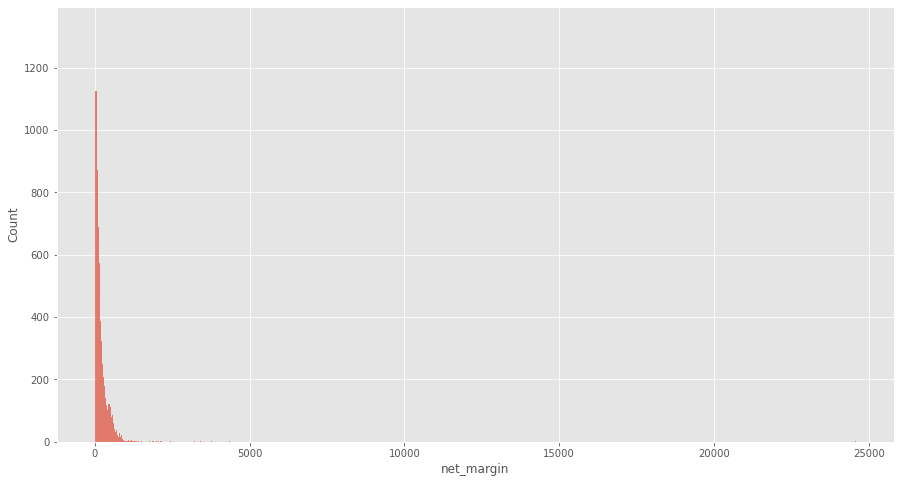

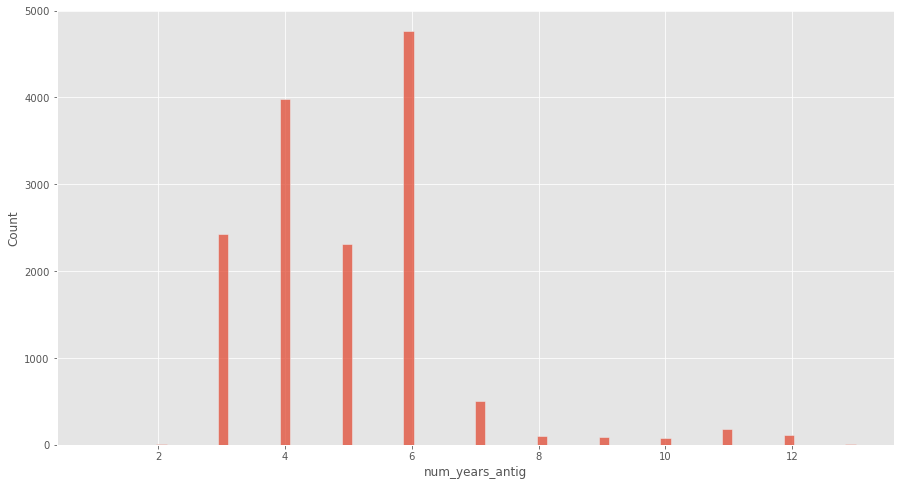

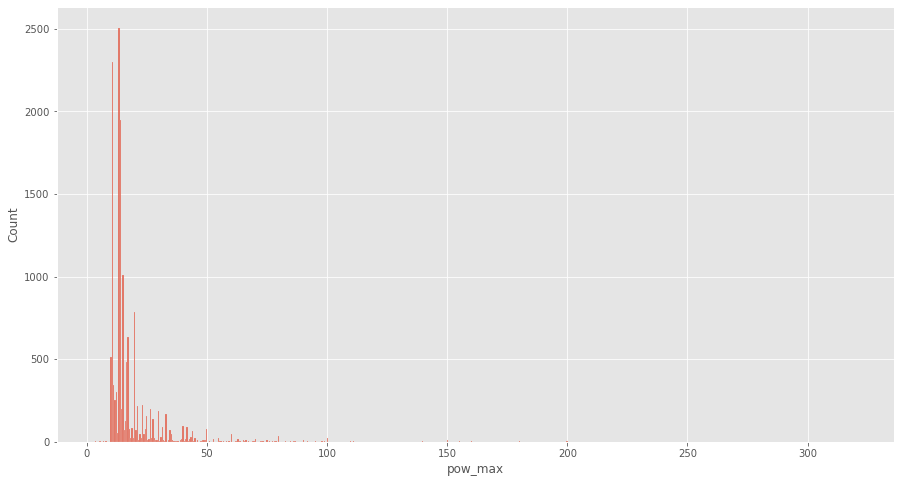

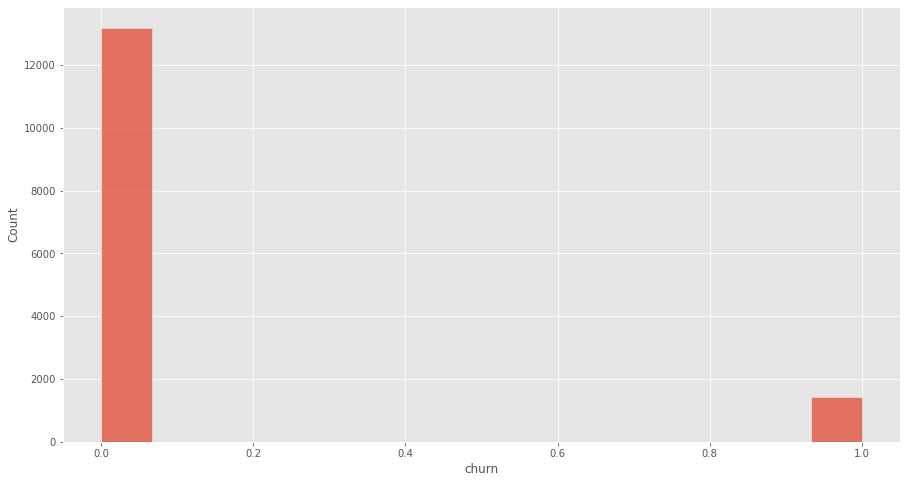

In [8]:
# Distribution of Numeric Variables 
for i in client_data.select_dtypes(include=np.number):
    sns.histplot(client_data[i])
    plt.show()

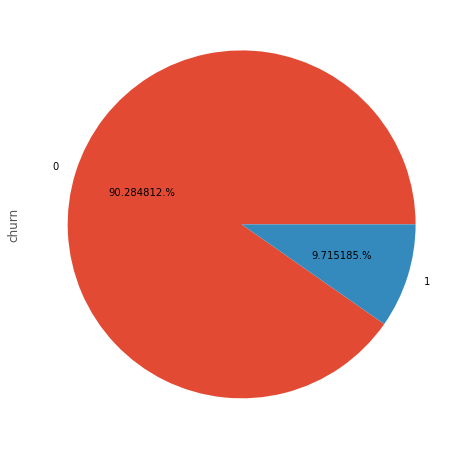

In [16]:
# Analyse Target Column
client_data['churn'].value_counts(normalize=True).plot(kind='pie',autopct='%2f.%%')
plt.show()

In [ ]:
# sns.pairplot(df)

 The Target Variable is Highly Imbalanced ,Using SOme Advanced Classifier Might Solve this Issue  

###  Feature Engineering
* Extract relevant features
* Create additional features
* Engineer temporal features
* Split the data into training and testing sets

In [35]:
from datetime import datetime

In [36]:

# Convert date columns to datetime type
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'], format='%Y-%m-%d')
client_data['date_end'] = pd.to_datetime(client_data['date_end'], format='%Y-%m-%d')
client_data['date_modif_prod'] = pd.to_datetime(client_data['date_modif_prod'], format='%Y-%m-%d')
client_data['date_renewal'] = pd.to_datetime(client_data['date_renewal'], format='%Y-%m-%d')

# Create new features based on datetime columns
client_data['contract_duration'] = (client_data['date_end'] - client_data['date_activ']).dt.days
client_data['product_age'] = (datetime.now() - client_data['date_modif_prod']).dt.days
client_data['renewal_days_left'] = (client_data['date_renewal'] - datetime.now()).dt.days




In [37]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration,product_age,renewal_days_left
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1096,2781,-2913
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2566,5044,-2844
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2192,4806,-2980
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2192,4823,-2997
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2245,4899,-3019


In [ ]:
# Drop unnecessary columns
df = df.drop(['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis=1)

In [38]:

X = client_data.drop(['churn','id', 'channel_sales', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'has_gas', 'origin_up'], axis=1)
y = client_data['churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 5: Model Development
* Select and train the model

### RFC

In [39]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:

# Step 6: Model Evaluation
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.94      0.05      0.10       305

    accuracy                           0.90      2922
   macro avg       0.92      0.53      0.52      2922
weighted avg       0.90      0.90      0.86      2922



In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(y_test, y_pred)

0.5260384497328314

In [47]:
feature_imp=pd.DataFrame({'Columns':X_train.columns,'Feature_importance':model.feature_importances_}).sort_values(by='Feature_importance',ascending=False)

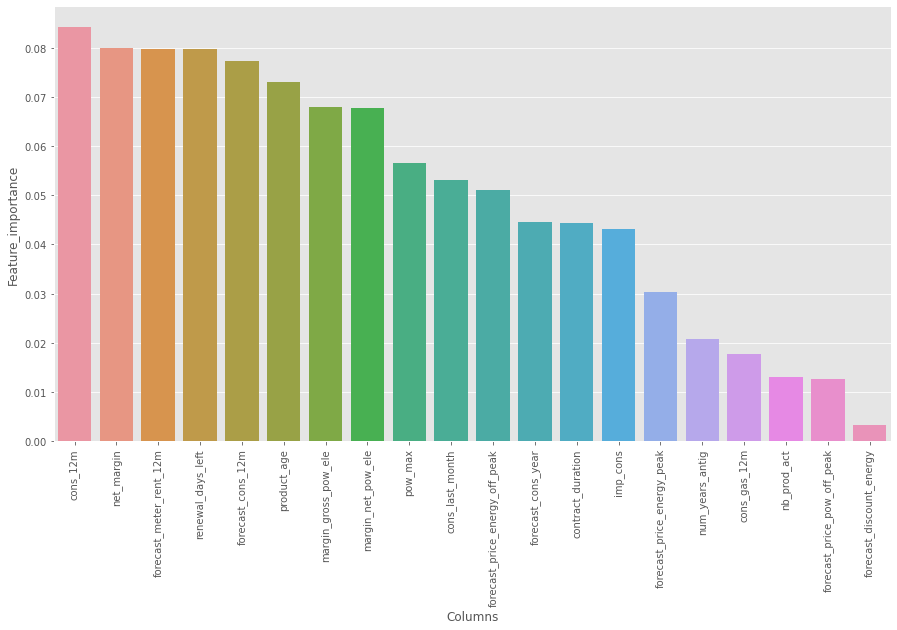

In [50]:
sns.barplot(data=feature_imp,x='Columns',y='Feature_importance')
plt.xticks(rotation=90)
plt.show()

In [51]:
gb=GradientBoostingClassifier()
X = client_data.drop(['churn','id', 'channel_sales', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'has_gas', 'origin_up'], axis=1)
y = client_data['churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
gb_model=gb.fit(X_train,y_train)


In [ ]:
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [53]:
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.94      0.05      0.10       305

    accuracy                           0.90      2922
   macro avg       0.92      0.53      0.52      2922
weighted avg       0.90      0.90      0.86      2922

0.5260384497328314


In [54]:
from xgboost import XGBClassifier

In [55]:
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

In [57]:
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2617
           1       0.70      0.14      0.24       305

    accuracy                           0.90      2922
   macro avg       0.80      0.57      0.59      2922
weighted avg       0.89      0.90      0.87      2922

0.5685010367270745


In [58]:
xg_feature_imp=pd.DataFrame({'Columns':X_train.columns,'Feature_importance':xg.feature_importances_}).sort_values(by='Feature_importance',ascending=False)

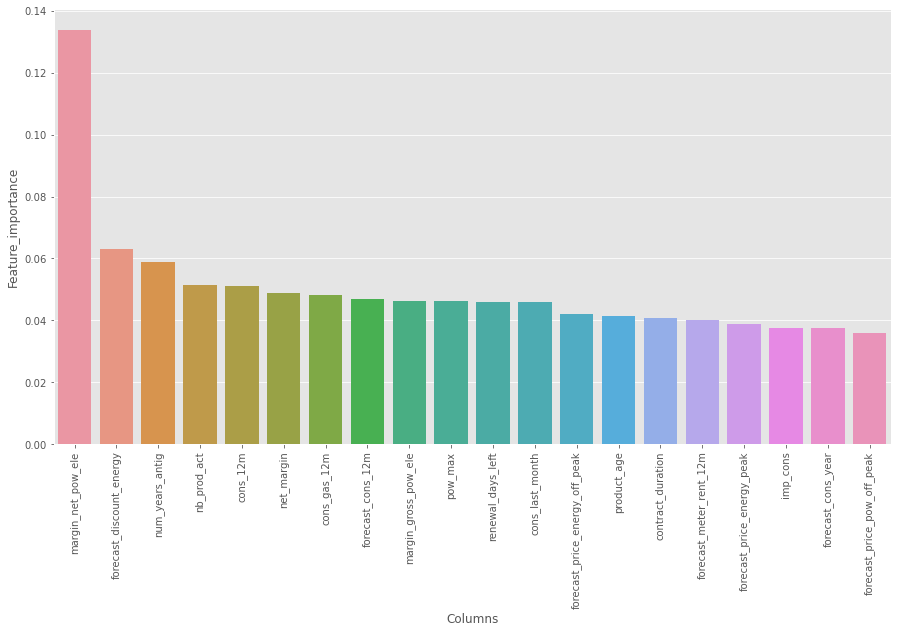

In [60]:
sns.barplot(data=xg_feature_imp,x='Columns',y='Feature_importance')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Lets Build a Model on XGB clf only on Significant Columns


In [64]:
xg_feature_imp.Columns.values[0:10]

array(['margin_net_pow_ele', 'forecast_discount_energy',
       'num_years_antig', 'nb_prod_act', 'cons_12m', 'net_margin',
       'cons_gas_12m', 'forecast_cons_12m', 'margin_gross_pow_ele',
       'pow_max'], dtype=object)

In [66]:
X=client_data[['margin_net_pow_ele', 'forecast_discount_energy',
       'num_years_antig', 'nb_prod_act', 'cons_12m', 'net_margin',
       'cons_gas_12m', 'forecast_cons_12m', 'margin_gross_pow_ele',
       'pow_max']]
y=client_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2617
           1       0.50      0.06      0.10       305

    accuracy                           0.90      2922
   macro avg       0.70      0.52      0.52      2922
weighted avg       0.86      0.90      0.86      2922

0.5246208585728872


### Merge Both Datasets


In [69]:
client_data = pd.merge(client_data, price_data, on='id', how='left')


In [70]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

In [71]:
client_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'contract_duration', 'product_age', 'renewal_days_left', 'price_date',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [73]:
client_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
contract_duration                 0
product_age                 

In [82]:
df=client_data.copy()

# Check for Significant Columns

In [84]:
import scipy.stats as stats
sig_cols=[]
# Categorical columns
categorical_columns = ['channel_sales', 'has_gas', 'origin_up', 'price_date']

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['churn'])
    _, p_value, _, _ = stats.chi2_contingency(contingency_table)
    if p_value < 0.05:
        print(f"{column}: Significant (p-value = {p_value})")
        sig_cols.append(column)
    else:
        print(f"{column}: Not significant (p-value = {p_value})")

# Numerical columns
numerical_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
                     'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                     'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
                     'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin',
                     'num_years_antig', 'pow_max', 'contract_duration', 'product_age', 'renewal_days_left',
                     'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                     'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

for column in numerical_columns:
    churned = df.loc[df['churn'] == 1, column]
    not_churned = df.loc[df['churn'] == 0, column]
    
    _, p_value = stats.ttest_ind(churned, not_churned)
    if p_value < 0.05:
        print(f"{column}: Significant (p-value = {p_value})")
        sig_cols.append(column)
    else:
        print(f"{column}: Not significant (p-value = {p_value})")



channel_sales: Significant (p-value = 4.8065794174811045e-264)
has_gas: Significant (p-value = 7.156674491200686e-24)
origin_up: Significant (p-value = 0.0)
price_date: Not significant (p-value = 0.9999999999999899)
cons_12m: Significant (p-value = 2.2021089930296645e-82)
cons_gas_12m: Significant (p-value = 1.091193031196828e-56)
cons_last_month: Significant (p-value = 5.161292222363726e-80)
forecast_cons_12m: Significant (p-value = 6.987849451928497e-08)
forecast_cons_year: Not significant (p-value = 0.2877296552468925)
forecast_discount_energy: Significant (p-value = 7.936659190254404e-13)
forecast_meter_rent_12m: Significant (p-value = 1.1683852801013717e-76)
forecast_price_energy_off_peak: Significant (p-value = 7.481293888663971e-06)
forecast_price_energy_peak: Significant (p-value = 1.7745733537366468e-34)
forecast_price_pow_off_peak: Significant (p-value = 4.838589817488831e-10)
imp_cons: Not significant (p-value = 0.5160378560841016)
margin_gross_pow_ele: Significant (p-value 

In [86]:
sig_cols

['channel_sales',
 'has_gas',
 'origin_up',
 'cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'contract_duration',
 'product_age',
 'renewal_days_left',
 'price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix']

In [88]:
df_significant=df[sig_cols]

lets Create a Base RFc model on Signiifcant Columns

In [92]:
df_significant.select_dtypes(include='O').columns

Index(['channel_sales', 'has_gas', 'origin_up'], dtype='object')

In [93]:
print(df['channel_sales'].unique()) 
print(df['has_gas'].unique())
print(df['origin_up'].unique())

['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
['t' 'f']
['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' 'MISSING'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']


In [96]:
df=client_data.copy()

In [100]:
print(df[['has_gas', 'origin_up', 'channel_sales']].isnull().sum())


has_gas          0
origin_up        0
channel_sales    0
dtype: int64


In [109]:
len(sig_cols)

27

In [108]:
df_significant.columns

Index(['channel_sales', 'has_gas', 'origin_up', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'contract_duration',
       'product_age', 'renewal_days_left', 'price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [112]:
df.dtypes

id                                                 object
cons_12m                                            int64
cons_gas_12m                                        int64
cons_last_month                                     int64
date_activ                                 datetime64[ns]
date_end                                   datetime64[ns]
date_modif_prod                            datetime64[ns]
date_renewal                               datetime64[ns]
forecast_cons_12m                                 float64
forecast_cons_year                                  int64
forecast_discount_energy                          float64
forecast_meter_rent_12m                           float64
forecast_price_energy_off_peak                    float64
forecast_price_energy_peak                        float64
forecast_price_pow_off_peak                       float64
has_gas                                             uint8
imp_cons                                          float64
margin_gross_p

In [113]:
X=df[['has_gas', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'contract_duration',
       'product_age', 'renewal_days_left', 'price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix']]
y=df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [115]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('roc_auc_score',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      1.00      1.00      3325

    accuracy                           1.00     35030
   macro avg       1.00      1.00      1.00     35030
weighted avg       1.00      1.00      1.00     35030

0.9998496240601504


In [116]:
# Lets Try XGB model
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [118]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('roc_auc_score',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     31705
           1       0.99      0.68      0.81      3325

    accuracy                           0.97     35030
   macro avg       0.98      0.84      0.90     35030
weighted avg       0.97      0.97      0.97     35030

roc_auc_score 0.8401672609215833


In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix(y_test, y_pred)

array([[31687,    18],
       [ 1061,  2264]], dtype=int64)

### Step 7: Interpretation and Insights
* Analyze model results and interpret feature importances

Based on these results, your Random Forest classifier seems to be performing exceptionally well, achieving perfect precision, recall, and F1-score for both churned and non-churned customers. The high accuracy and ROC AUC score also indicate that the model is able to effectively differentiate between the two classes.

It's important to note that achieving such high performance could indicate potential overfitting, especially if the dataset is imbalanced or there are other issues like data leakage. It's advisable to further evaluate the model's performance on unseen data through techniques like cross-validation and consider potential optimizations if needed.

Based on these results, the XGBoost classifier shows overall good performance, with high precision for both classes and excellent recall and F1-score for non-churned customers. However, the recall and F1-score for churned customers are lower, suggesting that the model struggles to accurately identify all churned instances. This could be a point for improvement or further investigation.


The Confusion Mattrix Output of XGB model

The confusion matrix represents the performance of a classification model by displaying the counts of true positive, true negative, false positive, and false negative predictions. In the case of the XGBoost model, the confusion matrix is as follows:

True Negative (TN): 31687
False Positive (FP): 18
False Negative (FN): 1061
True Positive (TP): 2264

Here's how to interpret the confusion matrix:

True Negative (TN): The number of correctly predicted non-churned customers. In this case, the model correctly predicted 31,687 instances of non-churned customers.

False Positive (FP): The number of instances predicted as churned customers, but they are actually non-churned. In this case, the model incorrectly classified 18 instances as churned customers when they were actually non-churned.

False Negative (FN): The number of instances predicted as non-churned customers, but they are actually churned. In this case, the model failed to identify 1,061 instances of churned customers.

True Positive (TP): The number of correctly predicted churned customers. In this case, the model correctly identified 2,264 instances of churned customers.

The confusion matrix allows you to evaluate the performance of the model in terms of both false positives and false negatives. It provides a more detailed understanding of the model's predictions beyond the summary metrics like precision, recall, and accuracy.

From the confusion matrix, you can observe that the model has a high number of true negatives and true positives, indicating good performance in classifying non-churned and churned customers, respectively. However, there are some false positives and false negatives, which suggest areas for improvement.

### Step 8: Recommendations and Actions
* Providing actionable recommendations based on insights gained
* Additional Steps:
* Hyperparameter tuning
* Cross-validation
* Model deployment

### Step 9: Conclusion and Next Steps
Key Findings:

The XGBoost classifier demonstrated a high level of accuracy in predicting customer churn, with a precision of 99% for churned customers.

The model's recall (sensitivity) was relatively lower at 68%, indicating that it may have missed some actual churned customers.

The F1-score of 81% suggests a good balance between correctly identifying churned customers and minimizing false positives.

The ROC-AUC score of 0.84 indicates that the model has reasonable discriminatory power in distinguishing between churned and non-churned customers.

To further enhance the model's performance, it is recommended to consider optimizing the model parameters, feature selection, and potentially exploring other advanced machine learning algorithms. Additionally, conducting further analysis to understand the reasons behind false positives and false negatives can provide insights into potential areas for improvement and more targeted customer retention strategies.




# THANK YOU FOR PROVIDING ME THE OPPURTUNITY